# Linear Regression

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Wine Quality

In [38]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

In [39]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
x = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [12]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

print(y_pred[:10])

[5.34666441 5.05631345 5.66446972 5.46451484 5.72518476 5.27928659
 5.03421667 5.12623347 5.74534288 5.68665032]


In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2 = {r2}")

MSE: 0.39002514396395493
R2 = 0.4031803412796219


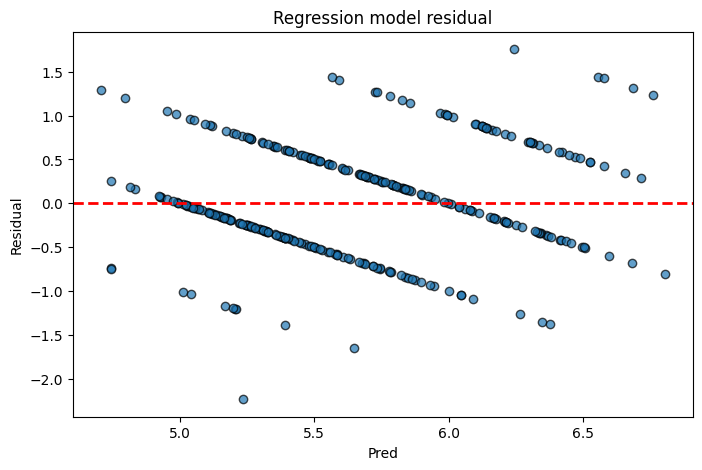

In [15]:
residuos = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuos, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Regression model residual")
plt.xlabel("Pred")
plt.ylabel("Residual")
plt.show()

## Future sales

In [17]:
url2 = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df2 = pd.read_csv(url2, sep=',')

In [36]:
df2.drop(columns='Unnamed: 0', inplace=True)

In [37]:
print("Cabecera del DataFrame")
print(df2.head())
print("\nValores nulos")
print(df2.isnull().sum())

Cabecera del DataFrame
      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Valores nulos
TV           0
radio        0
newspaper    0
sales        0
dtype: int64



Primeros 10 valores predichos
[16.41227699 20.84319293 21.51186915 10.65309994 22.12405753 13.12383506
 21.03748883  7.50385439 13.64787029 15.12040886]

Evaluación del modelo de regresión lineal
MSE: 3.20
R2 = 0.90


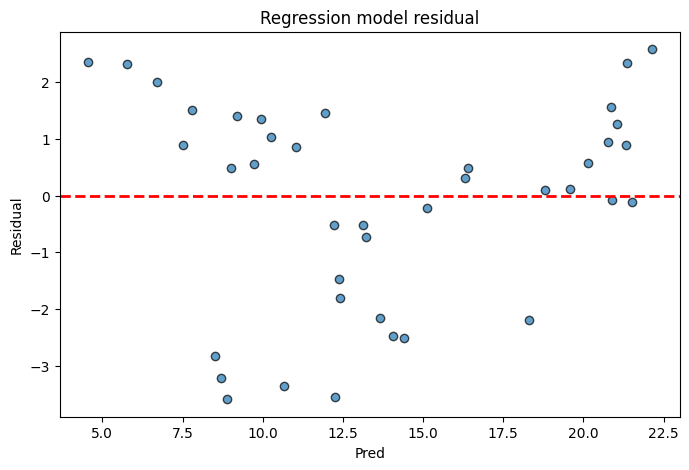

In [29]:
# División del DataFrame para train/test
x = df2.drop('sales', axis=1)
y = df2['sales']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Estandarización de los datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# Predicción
y_pred = model.predict(x_test_scaled)
print("\nPrimeros 10 valores predichos")
print(y_pred[:10])

# Evaluación
print("\nEvaluación del modelo de regresión lineal")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R2 = {r2:.2f}")

# Gráfico de predicción vs residuos
residuos = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuos, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Regression model residual")
plt.xlabel("Pred")
plt.ylabel("Residual")
plt.show()

El gráfico muestra una buena capacidad predictiva del modelo (R² = 0.90), indicando que explica el 90 % de la variabilidad de los datos. El MSE de 3.20 es relativamente bajo, lo que sugiere errores moderados. Sin embargo, los residuos no parecen distribuirse completamente al azar, se observa cierta curvatura, lo que podría indicar un ligero sesgo o una relación no lineal no capturada por el modelo. Podría ser útil probar un modelo más flexible para mejorar el ajuste.